# Задача 1

### Новые переменные:
$$
\begin{cases}
u_1 = x \\
u_2 = x' = u_1' \\
u_3 = y \\
u_4 = y' = u_3' \\ 
\end{cases}
$$
### Новая система уравнений
$$
\begin{cases}
u_1' = u_2 \\
u_2' = - u_1T / Lm \\
u_3' = u_4 \\
u_4' = - u_3T / Lm - F(t) / m \\
\end {cases} \\
$$

### Выразим T: 
$$
T = T(t, u)= (1 / L) * (m*(u_2^2 + u_4^2) - u_3F(t))
$$



Для $t \in [0; 4]$ при: \\
$$
\begin{cases}
u_1(t = 0) = 1 \\
u_2(t = 0) = 0 \\
u_3(t = 0) = -\sqrt{63} \\
u_4(t = 0) = 0 \\
\end{cases}
$$


In [5]:
%matplotlib inline

400
400


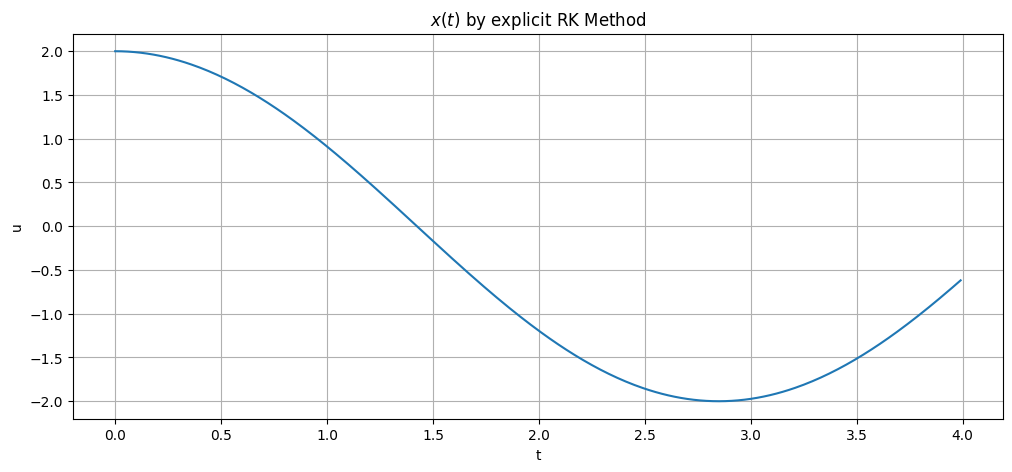

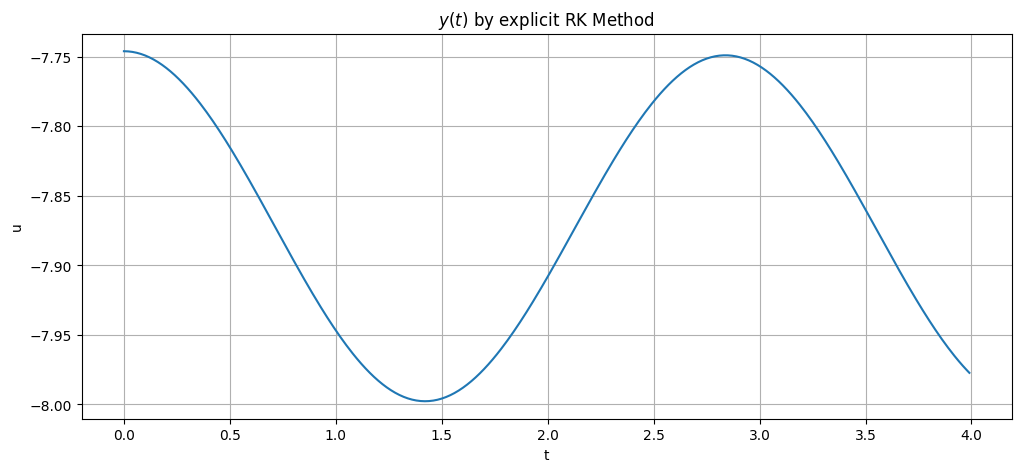

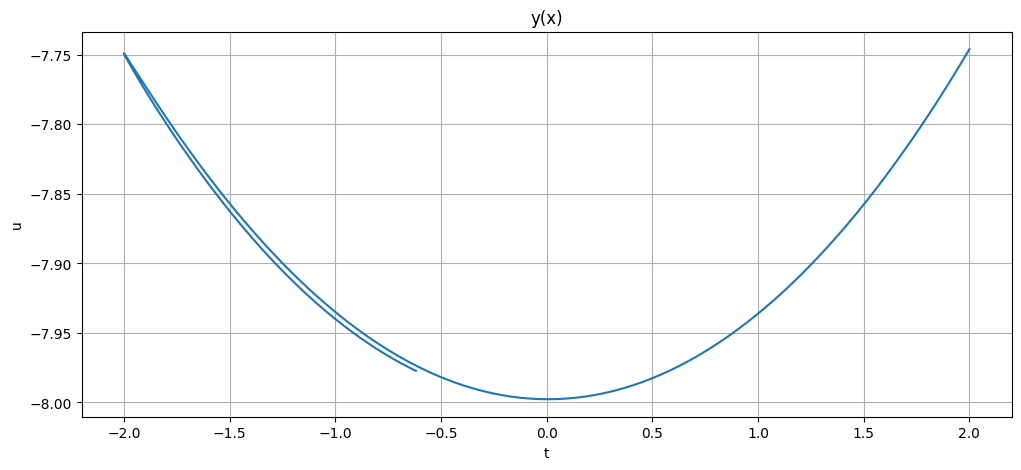

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math


def create_plot(x, y, title = ''):
    plt.figure(figsize = [12, 5])
    plt.plot(x, y)
    plt.xlabel("t")
    plt.ylabel("u")
    plt.title(title)
    plt.grid()
    plt.show()

m = 2
L = 8
t0 = 0
t1 = 4
tau = 1e-2 # 0.01
u0 = [2, 0.0, -np.sqrt(60.0), 0.0] 

def g(t : float):
    return 9.81 #+ 0.01 * np.cos(2 * np.pi * t)
def F(t: float):
    return m * g(t)

def f1(t : float, u : list, T):
    return u[1]
def f2(t : float, u : list, T):
    return - u[0] * T / (L * m)
def f3(t : float, u : list, T):
    return u[3]
def f4(t : float, u : list, T):
    return -u[2] * T / (L * m) - F(t) / m

def count_T(t : float, u: list):
    return (1 / L) * (m * (u[1] ** 2 + u[3] ** 2) -  u[2] * F(t))


def explicitRungeKuttaMethod(t0, t1, f : list, u0 : list, h = 1e-3):
    u_list = [u0]
    t_list = [t0 + i * h for i in range(int((t1 - t0) / h))]
    it_num = len(t_list)


    for i in range(it_num - 1):
        T = count_T(t_list[i], u_list[i])

        k1 = [f[m](t_list[i], u_list[i], T) for m in range(len(f))] 
        k2 = [f[m](t_list[i] + h / 2, u_list[i] + np.dot((h / 2), k1), T) for m in range(len(f))]
        k3 = [f[m](t_list[i] + h / 2, u_list[i] + np.dot((h / 2), k2), T) for m in range(len(f))]
        k4 = [f[m](t_list[i] + h, u_list[i] + np.dot(h, k3), T) for m in range(len(f))]
        # print(k1, k2, k3, k4)
        u_list.append(np.add(u_list[i], np.dot((h / 6), (k1 + np.dot(2, k2) + np.dot(2, k3) + k4))))

        T = count_T(t_list[i+1], u_list[i+1])

        k1 = [f[m](t_list[i], u_list[i], T) for m in range(len(f))] 
        k2 = [f[m](t_list[i] + h / 2, u_list[i] + np.dot((h / 2), k1), T) for m in range(len(f))]
        k3 = [f[m](t_list[i] + h / 2, u_list[i] + np.dot((h / 2), k2), T) for m in range(len(f))]
        k4 = [f[m](t_list[i] + h, u_list[i] + np.dot(h, k3), T) for m in range(len(f))]
        u_list[i+1] = (np.add(u_list[i], np.dot((h / 6), (k1 + np.dot(2, k2) + np.dot(2, k3) + k4))))
       
    # print(t_list, u_list)
    return t_list, u_list

t, u = explicitRungeKuttaMethod(t0, t1, [f1, f2, f3, f4], u0, tau)

x = []
y = []
print(len(t))
print(len(u))
for i in range(len(u)):
    x.append(u[i][0])
    y.append(u[i][2])

create_plot(t, x, '$x(t)$ by explicit RK Method')
create_plot(t, y, '$y(t)$ by explicit RK Method')
create_plot(x, y, 'y(x)')

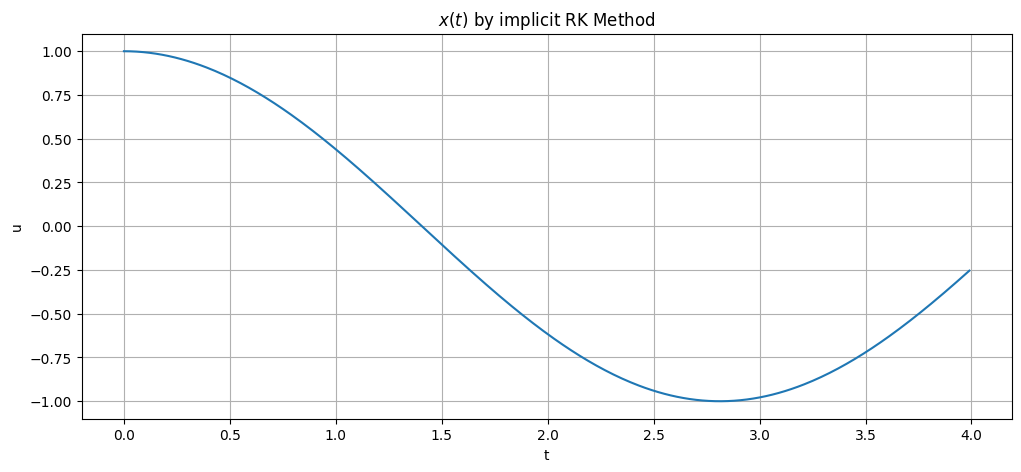

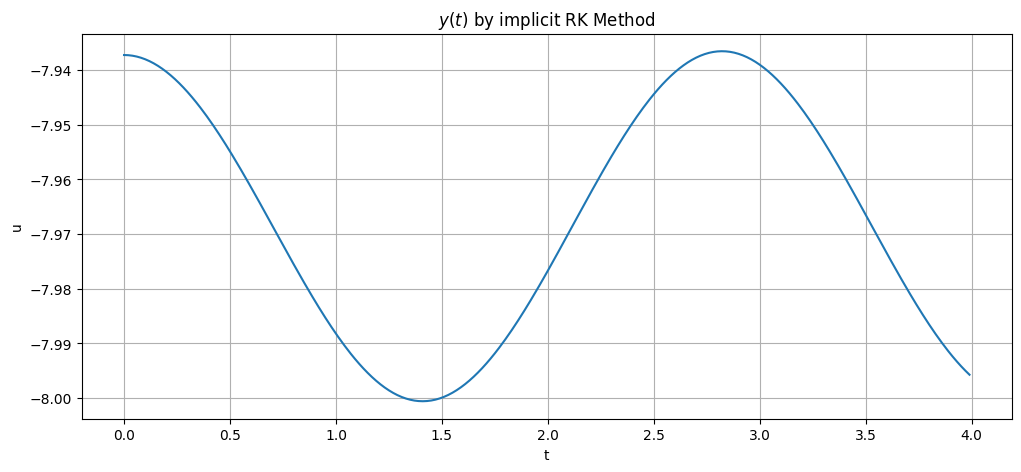

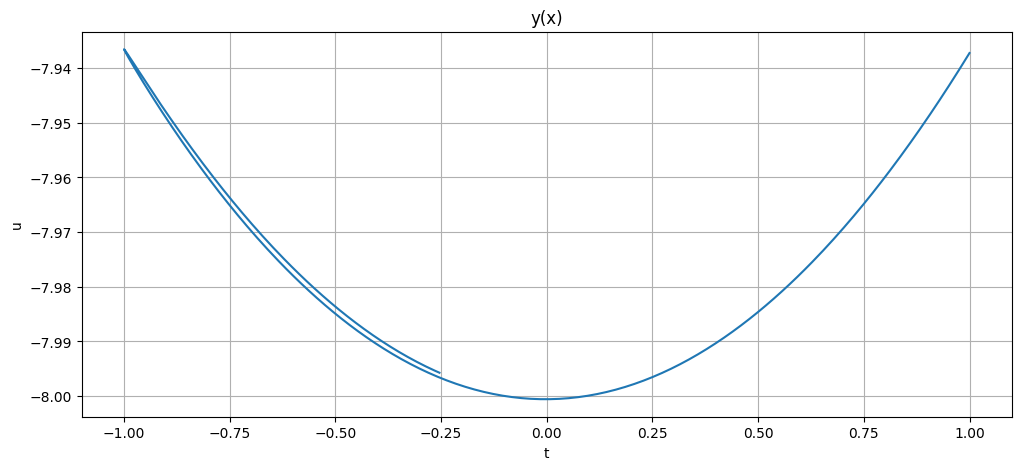

In [10]:
# Butcher's table for 4th order Runge-Kutta method (Gauss Method)
A = [[5/12, -1/12], \
     [3/4, 1/4]]
b = [3/4, 1/4]
c = [1/3, 1]
e = [1, 1]

# A = [[1/4, 1/4 - np.sqrt(3)/6], \
#      [1/4 + np.sqrt(3)/6, 1/4]]
# b = [1/2, 1/2]
# c = [1/2 - np.sqrt(3)/6, 1/2 + np.sqrt(3)/6]
# e = [1, 1]

def norma(x : list, y : list):
    max = 0
    for i in range(len(x)):
        if(abs(x[i] - y[i]) > max):
            max = abs(x[i] - y[i])
    return max

def implicitRungeKuttaMethod(t0, t1, f : list, u0 : list, h = 1e-3):
    t_list = np.arange(t0, t1, h)
    u_list = [u0]
    it_num = len(t_list)

    for i in range(it_num - 1):
        T = count_T(t_list[i], u_list[i])

        k1 = [f[m](t_list[i] + c[0] * h, u_list[i], T) for m in range(len(f))] 
        k2 = [f[m](t_list[i] + c[1] * h, u_list[i] + np.dot(A[1][0], k1), T) for m in range(len(f))]
        
        # print(k1)
        # simple iteration

        delta = 2 * h
        while(delta > h):
            temp_k1 = [f[m](t_list[i] + c[0] * h, u_list[i] + np.dot(h, (np.dot(A[0][0], k1) + np.dot(A[0][1], k2))), T) for m in range(len(f))]
            temp_k2 = [f[m](t_list[i] + c[1] * h, u_list[i] + np.dot(h, (np.dot(A[1][0], k1) + np.dot(A[1][1], k2))), T) for m in range(len(f))]

            delta = max(norma(k1, temp_k1), norma(k2, temp_k2))
            k1 = temp_k1
            k2 = temp_k2
        # print(k1, k2)
        
        u_list.append(np.add(u_list[i], np.dot(h, np.add(np.dot(b[0], k1), np.dot(b[1], k2)))))

    return t_list, u_list

t, u = implicitRungeKuttaMethod(t0, t1, [f1, f2, f3, f4], u0, tau)
# print(u)
# print(t, u)
x = []
y = []
# print(len(t))
# print(len(u))
for i in range(len(u)):
    x.append(u[i][0])
    y.append(u[i][2])


create_plot(t, x, '$x(t)$ by implicit RK Method')
create_plot(t, y, '$y(t)$ by implicit RK Method')
create_plot(x, y, 'y(x)')

# Задача 2

### Система уравнений:

$$
\begin{cases}
\frac{dx}{dt} = V_x \\
\frac{dy}{dt} = V_y \\
\frac{dV_x}{dt} = \frac{1}{m} (2V_y + x - \frac{\gamma(x-\mu)}{r_1^3} - \frac{\mu(x-\gamma)}{r_2^3} - fV_x) \\
\frac{dV_y}{dt} = -2 V_x + y - \frac{\gamma y}{r_1^3} - \frac{\mu y}{r_2^3} - f V_y \\
\end {cases} \\
\\
r_1 = r_1(x, y) \\
r_2 = r_2(x, y) \\
\mu = 0.00095388 \\
\gamma = 1 - \mu
$$



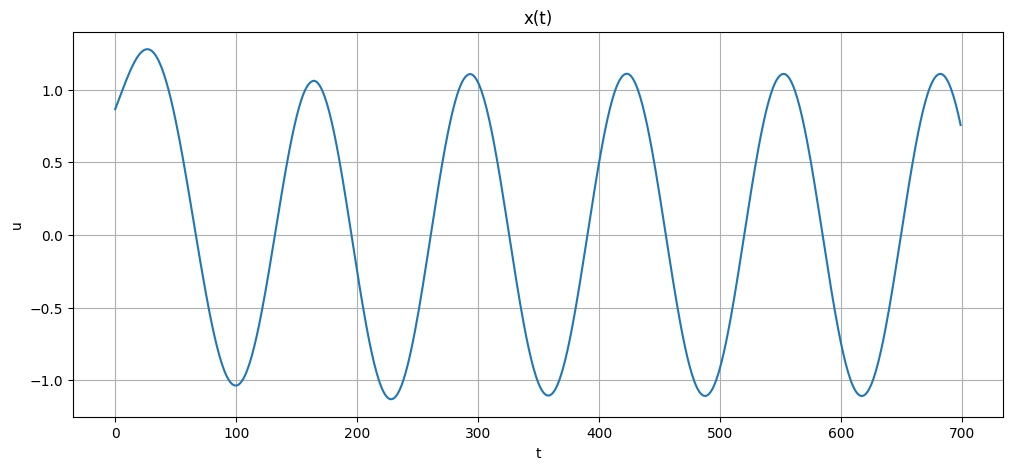

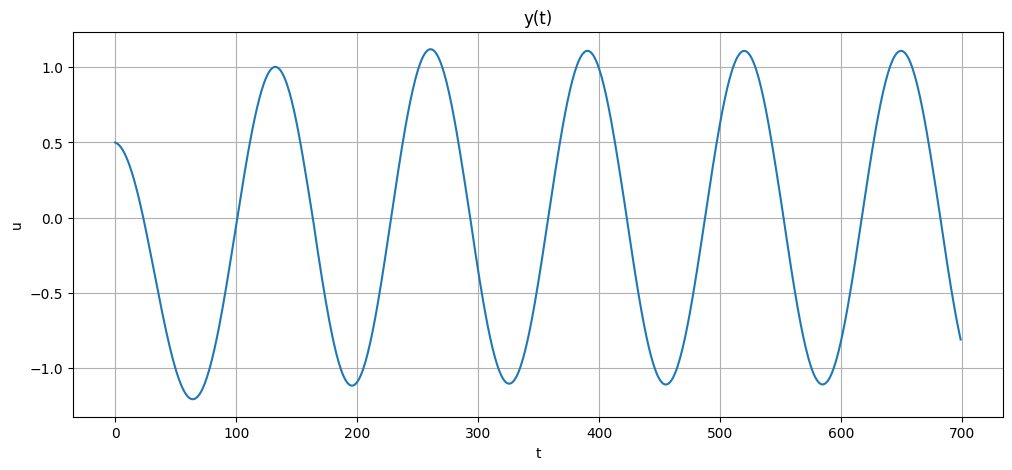

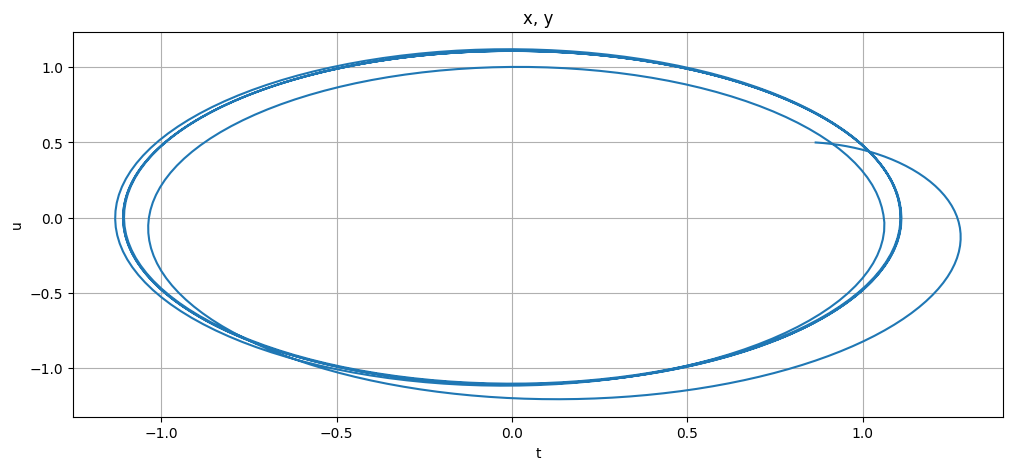

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

def create_plot(x, y, title = ''):
    plt.figure(figsize = [12, 5])
    plt.plot(x, y)
    plt.xlabel("t")
    plt.ylabel("u")
    plt.title(title)
    plt.grid()
    plt.show()

mu = 0.00095388
gamma = 1 - mu
# tau = 1e-3
Epsilon = 1e-6

R1 = [0.5 - 0.5 * mu, -0.5 * np.sqrt(3)]
R2 = [0.5 * np.sqrt(3), 0.5 - 0.5 * mu]
F1 = 0
F2 = 0.001
F3 = 0.1

f = F1
R = R2

def countR1(x, y):
    return math.sqrt((x + mu) ** 2 + y ** 2)

def countR2(x, y):
    return math.sqrt((x - gamma) ** 2 + y ** 2)

def f1(t, x, y, Vx, Vy):
    return Vx

def f2(t, x, y, Vx, Vy):
    return Vy

def f3(t, x, y, Vx, Vy):
    return (2 * Vy + x + gamma * (x + mu)/(countR1(x, y) ** 3) + mu * (x - gamma) / (countR2(x, y) ** 3) - f * Vx) 

def f4(t, x, y, Vx, Vy):
    return (- 2 * Vx + y + gamma * y / (countR1(x, y) ** 3) + mu * y / (countR2(x, y) ** 3) - f * Vy)

def getNorm(A):
    return np.sqrt(A[0] ** 2 + A[1] ** 2 + A[2] ** 2 + A[3] ** 2)
def getNormOfDiff(A, B):
    return math.sqrt((A[0]- B[0]) ** 2 + (A[1]- B[1]) ** 2 + (A[2]- B[2]) ** 2 + (A[3]-B[3]) ** 2)

def explicitRungeKhuttaFelbergMethod(t0, t1, f0 : list, f : list):
    tau = 1
    t = np.arange(t0, t1, tau)
    u = [f0] # list of lists of coordinates
    
    for i in range(len(t) - 1):
        Yn = u[i]
        k1 = [f[m](t[i], Yn[0], Yn[1], Yn[2], Yn[3]) for m in range(len(f))]

        Yn = [u[i][j] + (1/4) * tau * k1[j] for j in range(len(u[i]))]
        k2 = [f[m](t[i] + (1/4) * tau, Yn[0], Yn[1], Yn[2], Yn[3]) for m in range(len(f))]

        Yn = [u[i][j] + (3/32) * tau * k1[j] + (9/32) * tau * k2[j] for j in range(len(u[i]))]
        k3 = [f[m](t[i] + (3/8) * tau, Yn[0], Yn[1], Yn[2], Yn[3]) for m in range(len(f))]

        Yn = [u[i][j] + (1932/2197) * tau * k1[j] + (-7200/2197) * tau * k2[j] + (7296/2196) * tau * k3[j] for j in range(len(u[i]))]
        k4 = [f[m](t[i] + (12/13) * tau, Yn[0], Yn[1], Yn[2], Yn[3]) for m in range(len(f))]

        Yn = [u[i][j] + (439/216) * tau * k1[j] + (-8) * tau * k2[j] + (3680/513) * tau * k3[j] + (-845/4104) * tau *k4[j] for j in range(len(u[i]))]
        k5 = [f[m](t[i] + (1) * tau, Yn[0], Yn[1], Yn[2], Yn[3]) for m in range(len(f))]

        Yn = [u[i][j] + (-8/27) * tau * k1[j] + (2) * tau * k2[j] + (3544/2565) * tau * k3[j] + (1859/4104) * tau * k4[j] + (-11/40) * tau * k5[j] for j in range(len(u[i]))]
        k6 = [f[m](t[i] + (1/2) * tau, Yn[0], Yn[1], Yn[2], Yn[3]) for m in range(len(f))]

        Yn = u[i]
        Ynplus1Temp = [Yn[j] + tau * ((25/216) * k1[j] + (1408/2565) * k3[j] + (2197/4104) * k4[j] + (-1/5) * k5[j]) for j in range(len(Yn))]
        Ynplus1 = [Yn[j] + tau * ((16/135) * k1[j] + (6656/12825) * k3[j] + (28561/56430) * k4[j] + (-19/50) * k5[j] + (2/55) * k6[j]) for j in range(len(Yn))]

        tauOpt = tau * (Epsilon * tau / (2 * getNormOfDiff(Ynplus1, Ynplus1Temp))) ** (1/4)
        Ynplus1 = [Yn[j] + tauOpt * ((25/216) * k1[j] + (1408/2565) * k3[j] + (2197/4104) * k4[j] + (-1/5) * k5[j]) for j in range(len(Yn))]

        u.append(Ynplus1)


    return t, u

def main():
    t, u = explicitRungeKhuttaFelbergMethod(0, 700, [R[0], R[1], 0, 0], [f1, f2, f3, f4])
    x = []
    y = []
    # print(len(t))
    # print(len(u))
    for i in range(len(u)):
        x.append(u[i][0])
        y.append(u[i][1])
    
    create_plot(t, x, 'x(t)')
    create_plot(t, y, 'y(t)')
    create_plot(x, y, 'x, y')

if __name__ == "__main__":
    main()

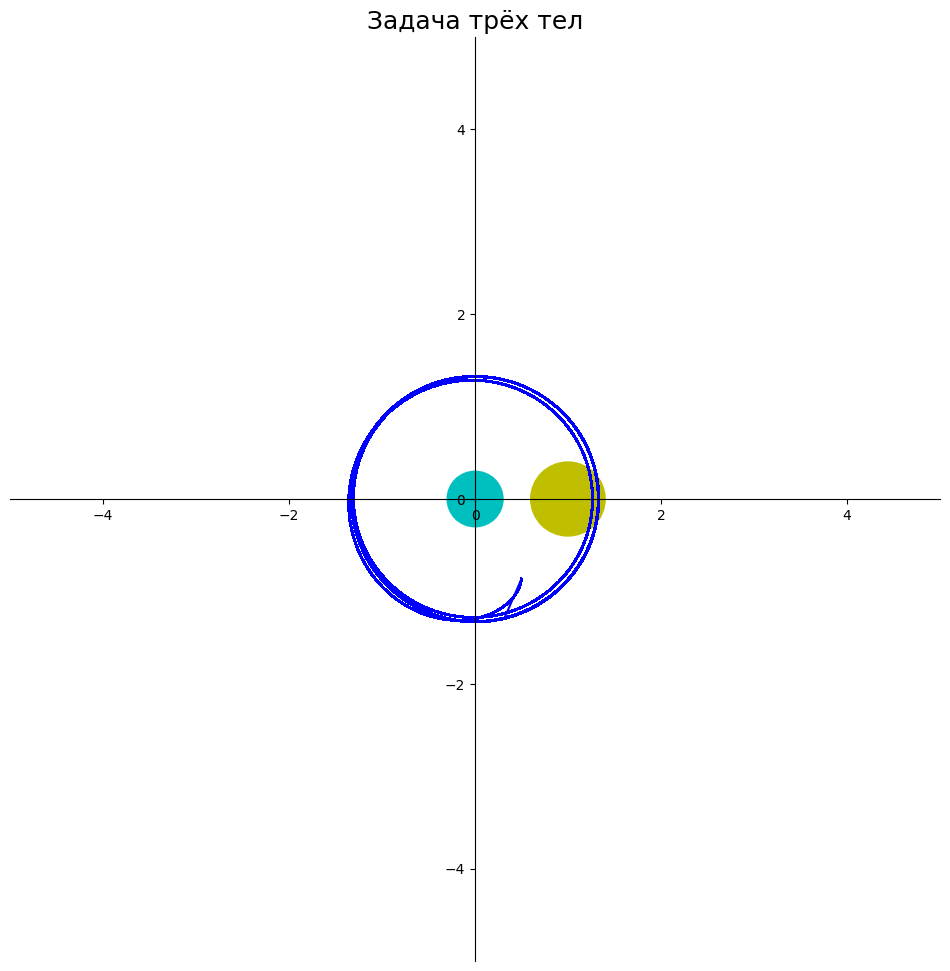

In [2]:
import matplotlib.animation as animation
import pandas as pd
import os

X_coord = []
Y_coord = []

def animate(i):
    X_coord.append(df['x'].iloc[i])
    Y_coord.append(df['y'].iloc[i])
    ax.plot(X_coord,Y_coord, 'b')

df = pd.DataFrame()
Args , AdamsVals = explicitRungeKhuttaFelbergMethod(0, 1000, [R[0], R[1], 0, 0], [f1, f2, f3, f4])
X = []
Y = []
for Val in AdamsVals:
    X.append(Val[0])
    Y.append(Val[1])
df['x'] = X
df['y'] = Y
df.head()
path_script = os.getcwd()
df.to_csv(path_script + '/dataset.csv', index = False)

df = pd.DataFrame()
path_script = os.getcwd()
df = pd.read_csv(path_script + '/dataset.csv')

fig,ax = plt.subplots(figsize = (12,12))

Lim = 5
ax.set_xlim(-Lim, Lim)
ax.set_ylim(-Lim, Lim)

ax.set_title('Задача трёх тел', fontsize = 18)

Yupiter = plt.Circle((mu, 0), 0.3, color='c', fill=True)
Sun = plt.Circle((gamma, 0), 0.4, color='y', fill=True)
    
ax = plt.gca()
    
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.add_patch(Yupiter)
ax.add_patch(Sun)

anim = animation.FuncAnimation(fig, animate,  frames = len(df.index), interval = len(df.index))
anim.save(os.getcwd() + '/ThreeCosmicBodies.gif', fps = 20, writer = 'pillow')

# Задача 3


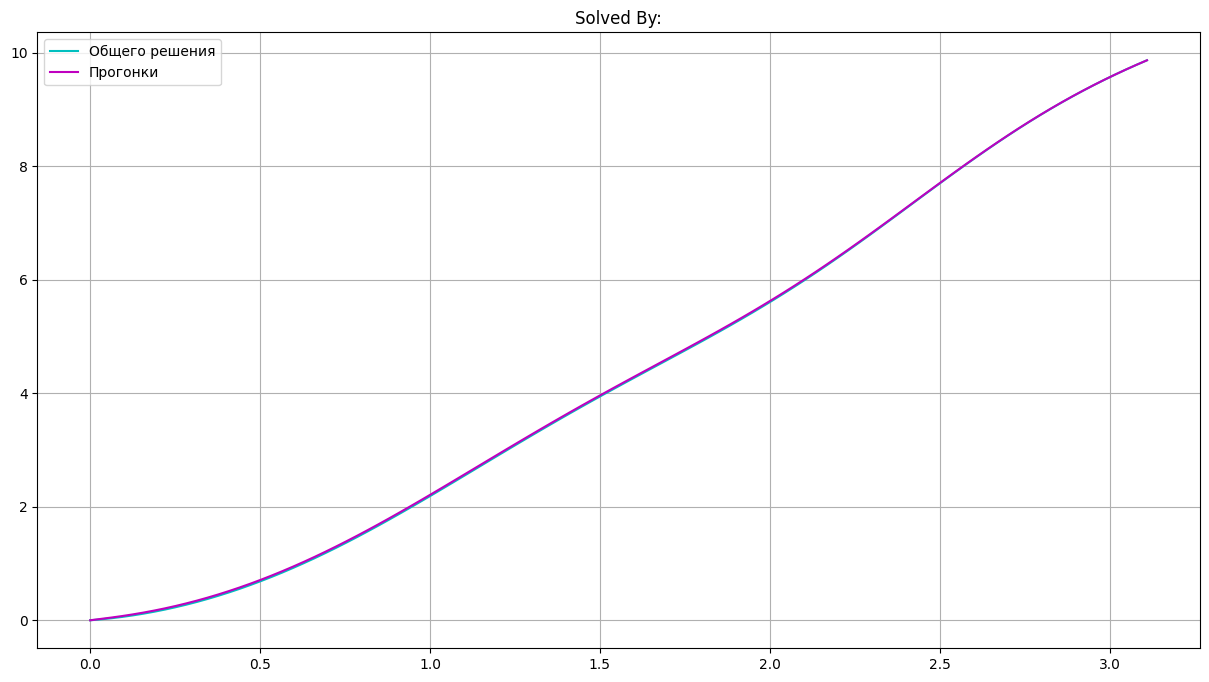

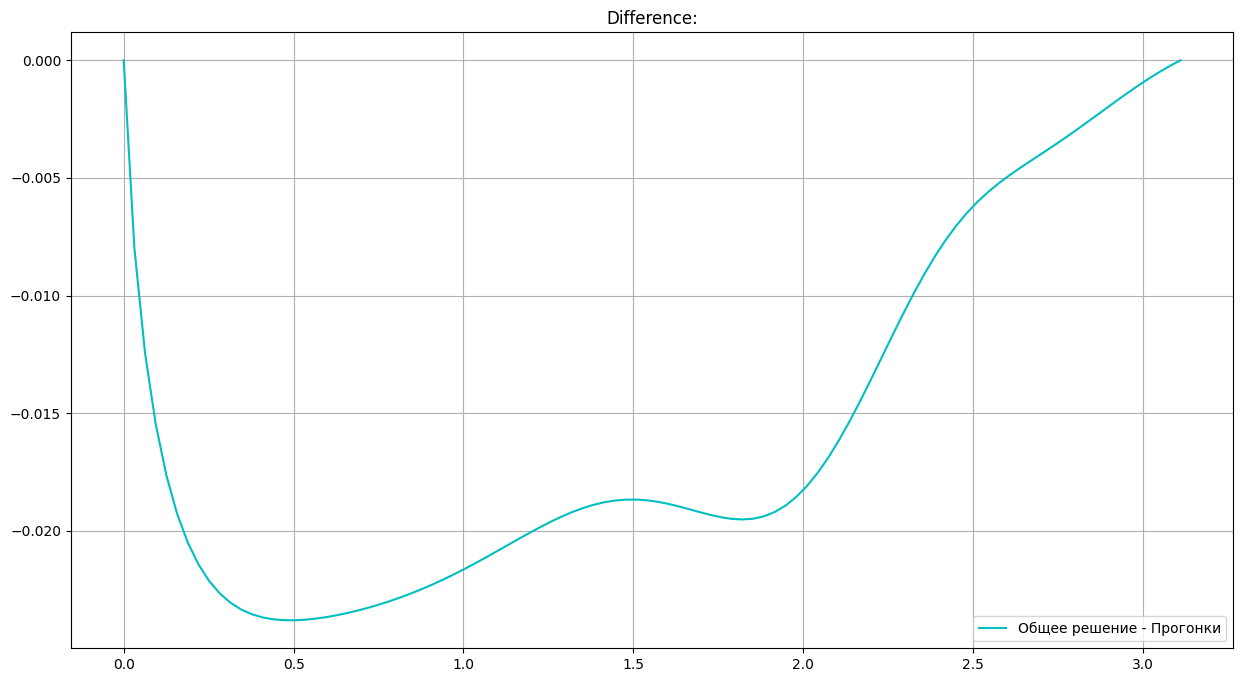

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

A = 0
B = math.pi

def P(x):
    
    return x**2 - 3

def Q(x):

    return math.cos(x) * (x**2 - 3)

def F(x):

    return 2 - 6 * x + 2 * x**3 + \
    (x**2 - 3) * math.exp(x) * math.sin(x) * \
    (1 + math.cos(x)) + math.cos(x) * \
    (math.exp(x) + (x**2 - 1) + x**4 - 3 * x**2)

def getSolutionSecondOrder(f, yAtStart, yDerAtStart, Args, h):

    N = len(Args)
    PArr = np.zeros(N)
    QArr = np.zeros(N)
    FArr = np.zeros(N)
    Y = np.zeros(N)
    for i in range(N):
        PArr[i] = P(Args[i])
        QArr[i] = Q(Args[i])
        FArr[i] = f(Args[i])
    Y[0] = yAtStart
    Y[1] = yAtStart + h * yDerAtStart
    for i in range(0, N - 2):
        Y[i+2] = (FArr[i] - QArr[i] * Y[i]) * h * h - \
        PArr[i] * (Y[i+1] - Y[i]) * h + 2 * Y[i+1] - Y[i]
    return Y

def getGeneralSolution(Args, a, b, h):

    N = len(Args) - 1
    def zero(x):
        return 0
    YPart = getSolutionSecondOrder(F, 0, 0, Args, h)
    Y1 = getSolutionSecondOrder(zero, 1, 0, Args, h)
    Y2 = getSolutionSecondOrder(zero, 0, 1, Args, h)
    Y = YPart + a * Y1 + (b - YPart[N] - a * Y1[N]) / Y2[N] * Y2
    return Y

def getSolutionFirstOrderZ1(z1AtStart, Args, h):

    N = len(Args)
    PArr = np.zeros(N)
    QArr = np.zeros(N)
    Z1 = np.zeros(N)
    for i in range(N):
        PArr[i] = P(Args[i])
        QArr[i] = Q(Args[i])
    Z1[0] = z1AtStart
    for i in range(0, N - 1):
        Z1[i + 1] = (Z1[i] * Z1[i] * QArr[i] + Z1[i] * PArr[i] + 1) \
        * h + Z1[i]
    return Z1

def getSolutionFirstOrderZ2(Z1, yAtStart, Args, h):

    N = len(Args)
    FArr = np.zeros(N)
    QArr = np.zeros(N)
    Z2 = np.zeros(N)
    for i in range(N):
        QArr[i] = Q(Args[i])
        FArr[i] = F(Args[i])
    Z2[0] = yAtStart
    for i in range(0, N - 1):
        Z2[i+1] = (Z1[i] * Z2[i] * QArr[i] - Z1[i] * FArr[i]) * h + Z2[i]
    return Z2

def getSolutionFirstOrderY(Z1, Z2, yAtEnd, h, N):

    Y = np.zeros(N)
    Y[N - 1] = yAtEnd
    for i in range(N - 1, 0, -1):
        Y[i-1] = (Y[i] * Z1[i-1] + Z2[i-1] * h) / (Z1[i-1] + h)
    return Y

def getSweepSolution(Args, a, b, h):

    N = len(Args)
    Z1 = getSolutionFirstOrderZ1(0, Args, h)
    Z2 = getSolutionFirstOrderZ2(Z1, a, Args, h)
    Y = getSolutionFirstOrderY(Z1, Z2, b, h, N)
    return Y

def main():
    N = 100
    a = 0
    b = math.pi**2
    h = (B - A) / N
    Args = np.arange(A, B, h)
    
    GeneralVals = getGeneralSolution(Args, a, b, h)
    SweepVals = getSweepSolution(Args, a, b, h)
    plt.figure(figsize = (15, 8))
    plt.title("Solved By:")
    plt.plot(Args, GeneralVals, 'c', label = "Общего решения")
    plt.plot(Args, SweepVals, 'm', label = "Прогонки")
    plt.legend()
    plt.grid()
    plt.show()
    
    Sub = []
    for i in range(len(GeneralVals)):
        Sub.append(GeneralVals[i] - SweepVals[i])
    
    plt.figure(figsize = (15, 8))
    plt.title("Difference:")
    plt.plot(Args, Sub, 'c', label = "Общее решение - Прогонки")
    plt.legend()
    plt.grid()
    plt.show()
    
    
if __name__ == '__main__':
    main()